In [570]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from ds_charts import get_variable_types

datasets = ['datasets/drought.csv', 'datasets/diabetic_data.csv']
dict_path = {'Set1':datasets[1], 'Set2':datasets[0]}
dict_name = {'Set1':'diabetic', 'Set2':'climate'}
dict_target = {'Set1':'readmitted', 'Set2':'class'}

set_ID = 1

file_path = dict_path['Set'+str(set_ID)]
file_name = dict_name['Set'+str(set_ID)]
target = dict_target['Set'+str(set_ID)]
data = pd.read_csv(file_path, na_values='?', low_memory=False)
print(data.shape)

data[target].unique()

variables = get_variable_types(data)
numeric_vars = variables['Numeric']
symbolic_vars = variables['Symbolic']
binary_vars = variables['Binary']
date_vars = variables['Binary']

(101766, 50)


In [571]:
for var in binary_vars+symbolic_vars:
    print(var, len(data[var].unique()))

acetohexamide 2
tolbutamide 2
troglitazone 2
glipizide-metformin 2
glimepiride-pioglitazone 2
metformin-rosiglitazone 2
metformin-pioglitazone 2
change 2
diabetesMed 2
race 6
gender 3
age 10
weight 10
payer_code 18
medical_specialty 73
diag_1 717
diag_2 749
diag_3 790
max_glu_serum 4
A1Cresult 4
metformin 4
repaglinide 4
nateglinide 4
chlorpropamide 4
glimepiride 4
glipizide 4
glyburide 4
pioglitazone 4
rosiglitazone 4
acarbose 4
miglitol 4
tolazamide 3
examide 1
citoglipton 1
insulin 4
glyburide-metformin 4
readmitted 3


In [572]:
import re

data = pd.read_csv(file_path, low_memory=False)
diag_1 = data['diag_1'].unique()
diag_2 = data['diag_2'].unique()
diag_3 = data['diag_3'].unique()

for index, i in enumerate(diag_1):
    #out = re.search(r'[a-zA-Z]', str(i))
    if '86' in str(i) or '69' in str(i):
        #print(i, end='  ')
        pass

print('\n\n')

for index, i in enumerate(diag_2):
    #out = re.search(r'[a-zA-Z]', str(i))
    if '86' in str(i) or '69' in str(i):
        #print(i, end='  ')
        pass

print('\n\n')

for index, i in enumerate(diag_3):
    #out = re.search(r'[a-zA-Z]', str(i))
    if '86' in str(i) or '69' in str(i):
        #print(i, end='  ')
        pass

In [573]:
data_encoded = pd.read_csv(file_path, na_values='?', low_memory=False)

for index, value in enumerate(data_encoded['diag_1']):
    if 'E' in str(value):
        data_encoded['diag_1'][index] = ('69.' + value.replace('E', ''))
    if 'V' in str(value):
        data_encoded['diag_1'][index] = ('86.' + value.replace('V', ''))

for index, value in enumerate(data_encoded['diag_2']):
    if 'E' in str(value):
        data_encoded['diag_2'][index] = ('69.' + value.replace('E', ''))
    if 'V' in str(value):
        data_encoded['diag_2'][index] = ('86.' + value.replace('V', ''))

for index, value in enumerate(data_encoded['diag_3']):
    if 'E' in str(value):
        data_encoded['diag_3'][index] = ('69.' + value.replace('E', ''))
    if 'V' in str(value):
        data_encoded['diag_3'][index] = ('86.' + value.replace('V', ''))

In [574]:
#non-medication vars
dict_medications = {'No':0, 'Up':1, 'Down':2, 'Steady':3}
dict_yes_no = {'No':0, 'Ch':1, 'Yes':1}
dict_race = {'Caucasian':0, 'AfricanAmerican':1, 'Other':2, 'Asian':3, 'Hispanic':4}
dict_gender = {'Unknown/Invalid':0, 'Male':1, 'Female':2}
dict_age = {'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5, '[60-70)':6, '[70-80)':7, '[80-90)':8, '[90-100)':9}
dict_weight = {'[75-100)':75, '[50-75)':50, '[0-25)':0, '[100-125)':100, '[25-50)':25, '[125-150)':125, '[175-200)':175, '[150-175)':150, '>200':200}
dict_payer_code = {'MC':0, 'MD':1, 'HM':2, 'UN':3, 'BC':4, 'SP':5, 'CP':6, 'SI':7, 'DM':8, 'CM':9, 'CH':10, 'PO':11, 'WC':12, 'OT':13, 'OG':14, 'MP':15, 'FR':16}
dict_max_glu_serum = {'None':0, '>300':1, 'Norm':2, '>200':3}
dict_A1 = {'None':0, '>7':1, '>8':2, 'Norm':3}
dict_class = {'NO':int(0), '>30':int(1), '<30':int(2)}


data_encoded['change'] = data_encoded['change'].replace(dict_yes_no).astype('object')
data_encoded['diabetesMed'] = data_encoded['diabetesMed'].replace(dict_yes_no).astype('object')
data_encoded['race'] = data_encoded['race'].replace(dict_race).astype('object')
data_encoded['gender'] = data_encoded['gender'].replace(dict_gender).astype('object')
data_encoded['age'] = data_encoded['age'].replace(dict_age).astype('object')
data_encoded['weight'] = data_encoded['weight'].replace(dict_weight).astype('object')
data_encoded['payer_code'] = data_encoded['payer_code'].replace(dict_payer_code).astype('object')
data_encoded['max_glu_serum'] = data_encoded['max_glu_serum'].replace(dict_max_glu_serum).astype('object')
data_encoded['A1Cresult'] = data_encoded['A1Cresult'].replace(dict_A1).astype('object')
data_encoded['readmitted'] = data_encoded['readmitted'].replace(dict_class).astype('object')

#medication-vars
medication_vars = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

for var in medication_vars:
        data_encoded[var] =  data_encoded[var].replace(dict_medications).astype('object')

#medical_speciality
med = list(data_encoded['medical_specialty'].unique())
med_clean = [x for x in med if str(x) != 'nan']
dict_medical_speciality = {k: v for v, k in enumerate(med_clean)}
data_encoded['medical_specialty'] = data_encoded['medical_specialty'].replace(dict_medical_speciality).astype('object')

data_encoded.to_csv(f'datasets/{file_name}_data_encoded.csv', index=False)


In [575]:
for var in symbolic_vars+binary_vars:
        if var!='diag_1' and var!='diag_2' and var!='diag_3':
                print(var, (data_encoded[var].unique()))

race [0.0 1.0 nan 2.0 3.0 4.0]
gender [2 1 0]
age [0 1 2 3 4 5 6 7 8 9]
weight [nan 75.0 50.0 0.0 100.0 25.0 125.0 175.0 150.0 200.0]
payer_code [nan 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0
 16.0]
medical_specialty [0.0 nan 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0
 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0
 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0
 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0
 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0]
max_glu_serum [0 1 2 3]
A1Cresult [0 1 2 3]
metformin [0 3 1 2]
repaglinide [0 1 3 2]
nateglinide [0 3 2 1]
chlorpropamide [0 3 2 1]
glimepiride [0 3 2 1]
glipizide [0 3 1 2]
glyburide [0 3 1 2]
pioglitazone [0 3 1 2]
rosiglitazone [0 3 1 2]
acarbose [0 3 1 2]
miglitol [0 3 2 1]
tolazamide [0 3 1]
examide [0]
citoglipton [0]
insulin [0 1 3 2]
glyburide-metformin [0 3 2 1]
readmitted [0 1 2]
a

total: 192849


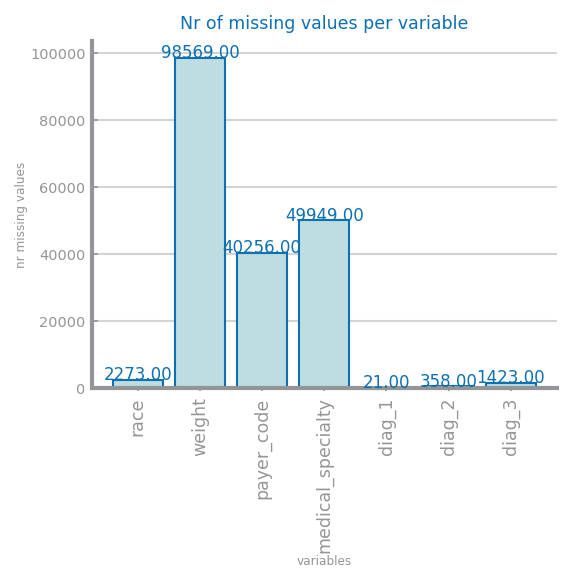

In [576]:
#missing values imputation

from matplotlib.pyplot import figure, savefig
from ds_charts import bar_chart

mv = {}
figure()
count = 0
c=0
for var in data_encoded:
    count += 1
    nr = data_encoded[var].isna().sum()
    if nr > 0:
        mv[var] = nr
        c += nr
    #print(var, nr)

print('total:', c)
bar_chart(list(mv.keys()), list(mv.values()), title='Nr of missing values per variable', xlabel='variables', ylabel='nr missing values', rotation=True)

In [577]:
#filling missing values

from sklearn.impute import SimpleImputer
from pandas import concat, DataFrame
from ds_charts import get_variable_types
from numpy import nan

tmp_nr, tmp_sb, tmp_bool = None, None, None
variables = get_variable_types(data_encoded)

numeric_vars = variables['Numeric']
symbolic_vars = variables['Symbolic']
binary_vars = variables['Binary']
date_vars = variables['Date']

data_mv_mostfrequent = read_csv('datasets/diabetic_data_encoded.csv')

if len(symbolic_vars) > 0:
    imp = SimpleImputer(strategy='most_frequent', missing_values=nan, copy=True)
    tmp_nr = DataFrame(imp.fit_transform(data_mv_mostfrequent[numeric_vars]), columns=numeric_vars)
if len(symbolic_vars) > 0:
    imp = SimpleImputer(strategy='most_frequent', missing_values=nan, copy=True)
    tmp_sb = DataFrame(imp.fit_transform(data_mv_mostfrequent[symbolic_vars]), columns=symbolic_vars)
if len(binary_vars) > 0:
    imp = SimpleImputer(strategy='most_frequent', missing_values=nan, copy=True)
    tmp_bool = DataFrame(imp.fit_transform(data_mv_mostfrequent[binary_vars]), columns=binary_vars)

data_mv_mostfrequent = concat([tmp_nr, tmp_sb, tmp_bool], axis=1)
data_mv_mostfrequent.index = data_encoded.index
data_mv_mostfrequent.to_csv(f'datasets/{file_name}_mv_most_frequent.csv', index=False)
df.describe(include='all')

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,readmitted,acetohexamide,tolbutamide,troglitazone,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,...,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54864.0,101765.0,101743.0,101763.0,101753.0,101765.0,101764.0,101765.0,54755.0,78363.0
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [578]:
# defines the number of variables to discard entire records
threshold = data_encoded.shape[1] * 1 #drops all rows with missing values 

data_mv_drop_records = data_encoded.dropna(thresh=threshold, inplace=False)
data_mv_drop_records.to_csv(f'datasets/{file_name}_mv_drop_records.csv', index=False)
print(data_mv_drop_records.shape[0]/data_encoded.shape[0])

0.010249002613839592


## Approach 1

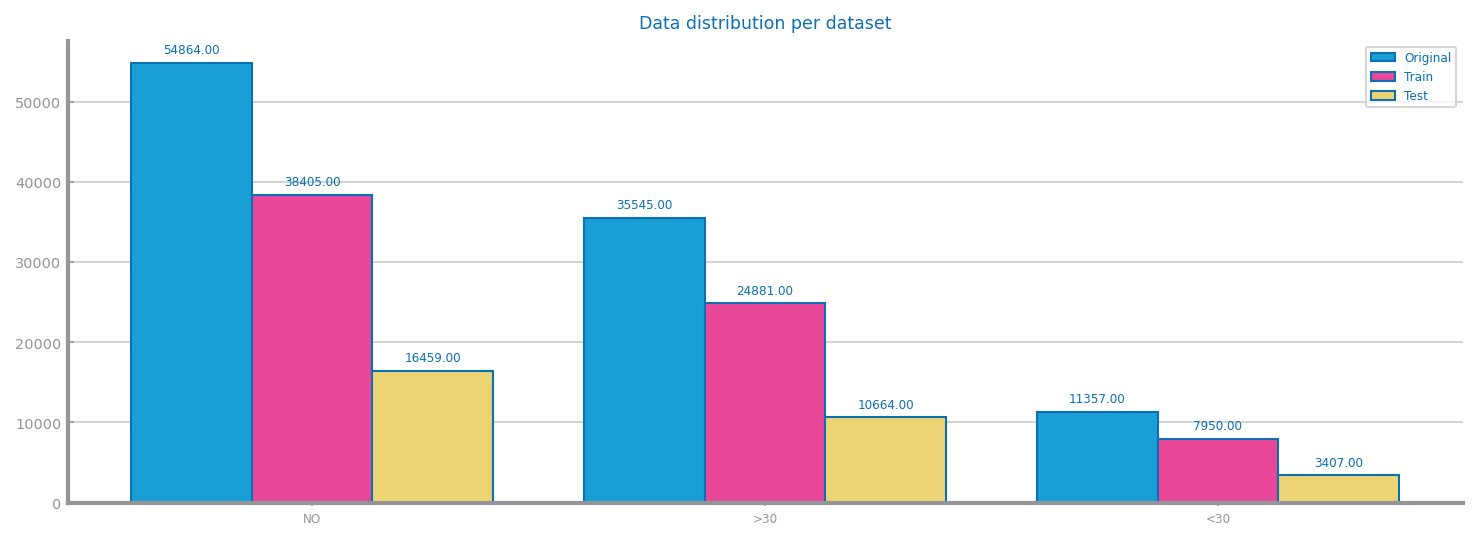

In [597]:
import numpy as np
from pandas import read_csv, concat, unique, DataFrame
import matplotlib.pyplot as plt
import ds_charts as ds
from ds_charts import multiple_bar_chart
from sklearn.model_selection import train_test_split

dataset = read_csv('datasets/diabetic_mv_most_frequent.csv')
target = 'readmitted'
values = {}

values['Original'] = [len(dataset[dataset[target] == 0]), len(dataset[data_encoded[target] == 1]), len(dataset[dataset[target] == 2] )]

y = dataset.pop(target).values
X = dataset.values
labels = unique(y)
labels.sort()

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train = concat([DataFrame(trnX, columns=dataset.columns), DataFrame(trnY,columns=[target])], axis=1)
train.to_csv(f'datasets/{file_name}_approach1_train.csv', index=False)

test = concat([DataFrame(tstX, columns=dataset.columns), DataFrame(tstY,columns=[target])], axis=1)
test.to_csv(f'datasets/{file_name}_approach1_test.csv', index=False)
values['Train'] = [len(np.delete(trnY, np.argwhere(trnY!=0))), len(np.delete(trnY, np.argwhere(trnY!=1))), len(np.delete(trnY, np.argwhere(trnY!=2)))]
values['Test'] = [len(np.delete(tstY, np.argwhere(tstY!=0))), len(np.delete(tstY, np.argwhere(tstY!=1))), len(np.delete(tstY, np.argwhere(tstY!=2)))]

plt.figure(figsize=(12,4))
multiple_bar_chart(['NO','>30','<30'], values, title='Data distribution per dataset')
plt.show()

## Approach 1 - NB

0.5633802816901409


<Figure size 600x450 with 0 Axes>

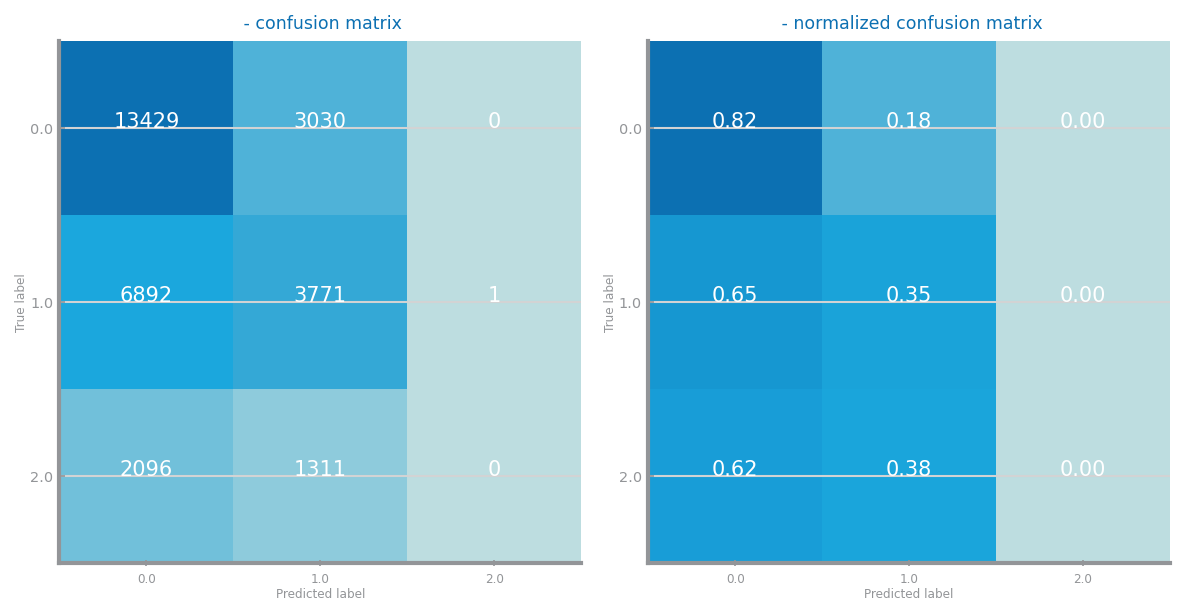

In [598]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from ds_charts import plot_evaluation_results, bar_chart, plot_confusion_matrix
from sklearn.metrics import confusion_matrix

labels = unique(trnY)
labels.sort()

clf = BernoulliNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

print(clf.score(tstX, tstY))

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,0], )
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,1], normalize=True)
plt.tight_layout()
plt.show()


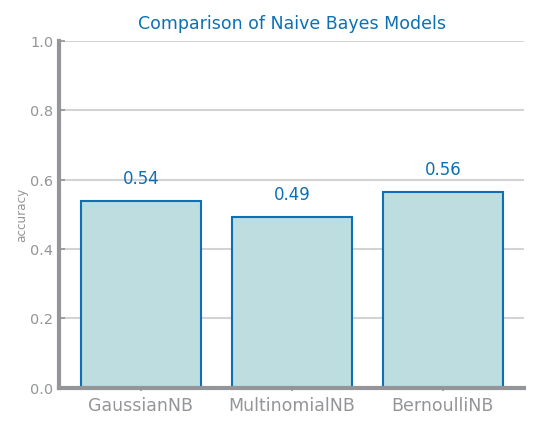

In [599]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score

estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB(),
              #'CategoricalNB': CategoricalNB
              }

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(accuracy_score(tstY, prdY))

figure()
bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='accuracy', percentage=True)
savefig(f'images/{file_tag}_nb_study.png')
show()

## Approach 1 - KNN

In [601]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, savefig, show
from sklearn.neighbors import KNeighborsClassifier
from ds_charts import plot_evaluation_results, multiple_line_chart, plot_overfitting_study
from sklearn.metrics import accuracy_score

eval_metric = accuracy_score
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
KNNscores = {}
best = (0, '')
last_best = 0
for d in dist:
    y_tst_values = []
    for n in nvalues:
        print(d,n)
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prd_tst_Y = knn.predict(tstX)
        y_tst_values.append(eval_metric(tstY, prd_tst_Y))
        if y_tst_values[-1] > last_best:
            best = (n, d)
            last_best = y_tst_values[-1]
    KNNscores[d] = y_tst_values

manhattan 1
manhattan 3
manhattan 5
manhattan 7
manhattan 9
manhattan 11
manhattan 13
manhattan 15
manhattan 17
manhattan 19
euclidean 1
euclidean 3
euclidean 5
euclidean 7
euclidean 9
euclidean 11
euclidean 13
euclidean 15
euclidean 17
euclidean 19
chebyshev 1
chebyshev 3
chebyshev 5
chebyshev 7
chebyshev 9
chebyshev 11
chebyshev 13
chebyshev 15
chebyshev 17
chebyshev 19


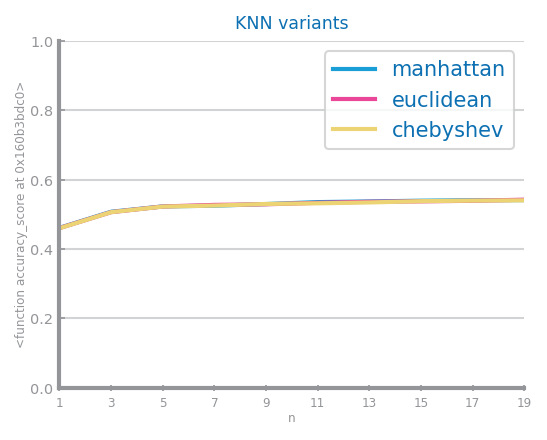

Best results with 19 neighbors and euclidean


In [604]:
from ds_charts import multiple_line_chart
figure()
multiple_line_chart(nvalues, KNNscores, title='KNN variants', xlabel='n', ylabel=str(accuracy_score), percentage=True)
#savefig('images/{file_tag}_knn_study.png')
show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

0.5421225024566001


<Figure size 600x450 with 0 Axes>

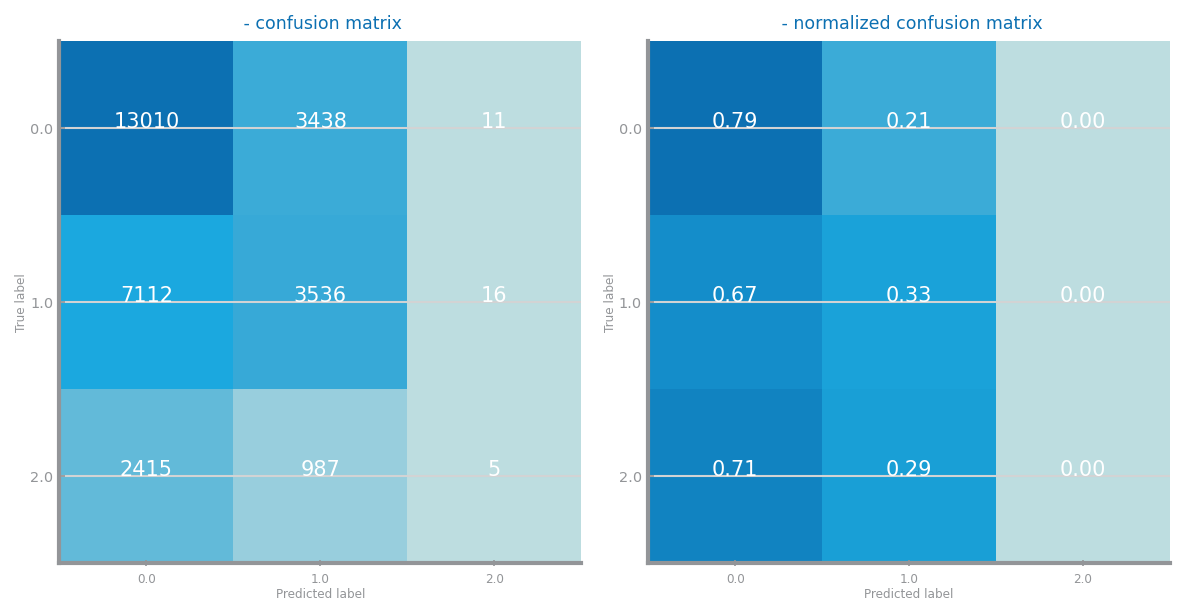

In [609]:
print(KNNscores[best[1]][9])

clf = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_tst = clf.predict(tstX)

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,0], )
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,1], normalize=True)
plt.tight_layout()
plt.show()

## Approach 2

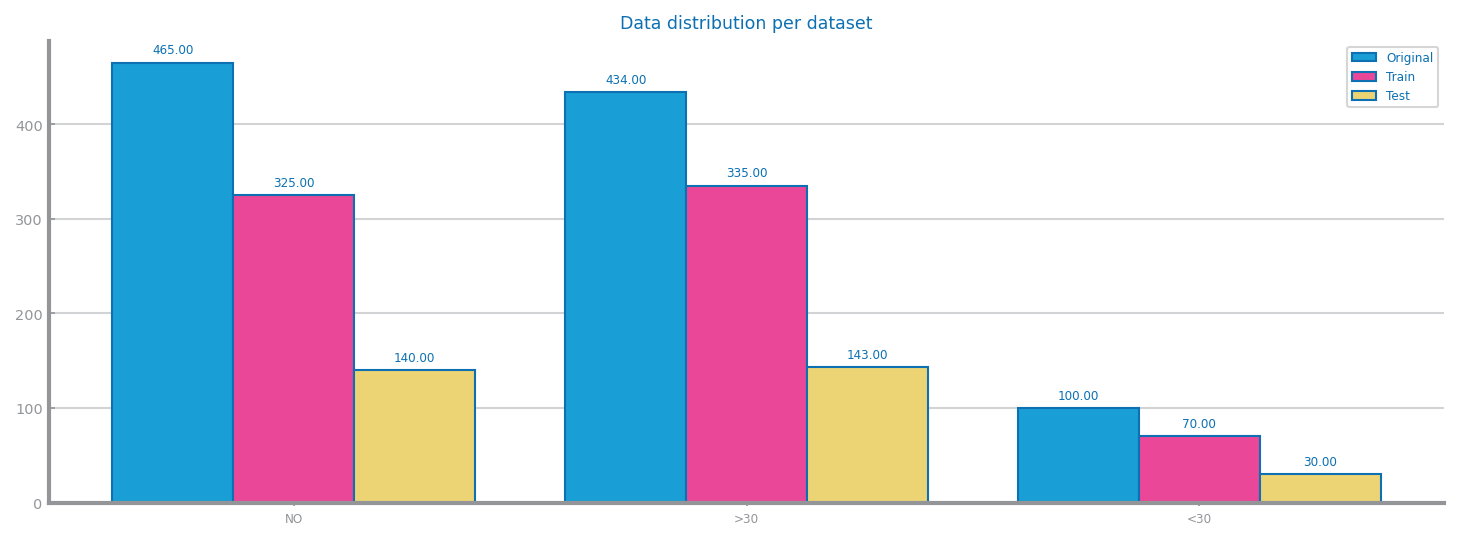

In [610]:
import numpy as np
from pandas import read_csv, concat, unique, DataFrame
import matplotlib.pyplot as plt
import ds_charts as ds
from ds_charts import multiple_bar_chart
from sklearn.model_selection import train_test_split

dataset = read_csv('datasets/diabetic_mv_drop_records.csv')
target = 'readmitted'
values = {}

values['Original'] = [len(dataset[dataset[target] == 0]), len(dataset[data_encoded[target] == 1]), len(dataset[dataset[target] == 2] )]

y = dataset.pop(target).values
X = dataset.values
labels = unique(y)
labels.sort()

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train = concat([DataFrame(trnX, columns=dataset.columns), DataFrame(trnY,columns=[target])], axis=1)
train.to_csv(f'datasets/{file_name}_approach1_train.csv', index=False)

test = concat([DataFrame(tstX, columns=dataset.columns), DataFrame(tstY,columns=[target])], axis=1)
test.to_csv(f'datasets/{file_name}_approach1_test.csv', index=False)
values['Train'] = [len(np.delete(trnY, np.argwhere(trnY!=0))), len(np.delete(trnY, np.argwhere(trnY!=1))), len(np.delete(trnY, np.argwhere(trnY!=2)))]
values['Test'] = [len(np.delete(tstY, np.argwhere(tstY!=0))), len(np.delete(tstY, np.argwhere(tstY!=1))), len(np.delete(tstY, np.argwhere(tstY!=2)))]

plt.figure(figsize=(12,4))
multiple_bar_chart(['NO','>30','<30'], values, title='Data distribution per dataset')
plt.show()

## Approach 2 - NB

0.5239616613418531


<Figure size 600x450 with 0 Axes>

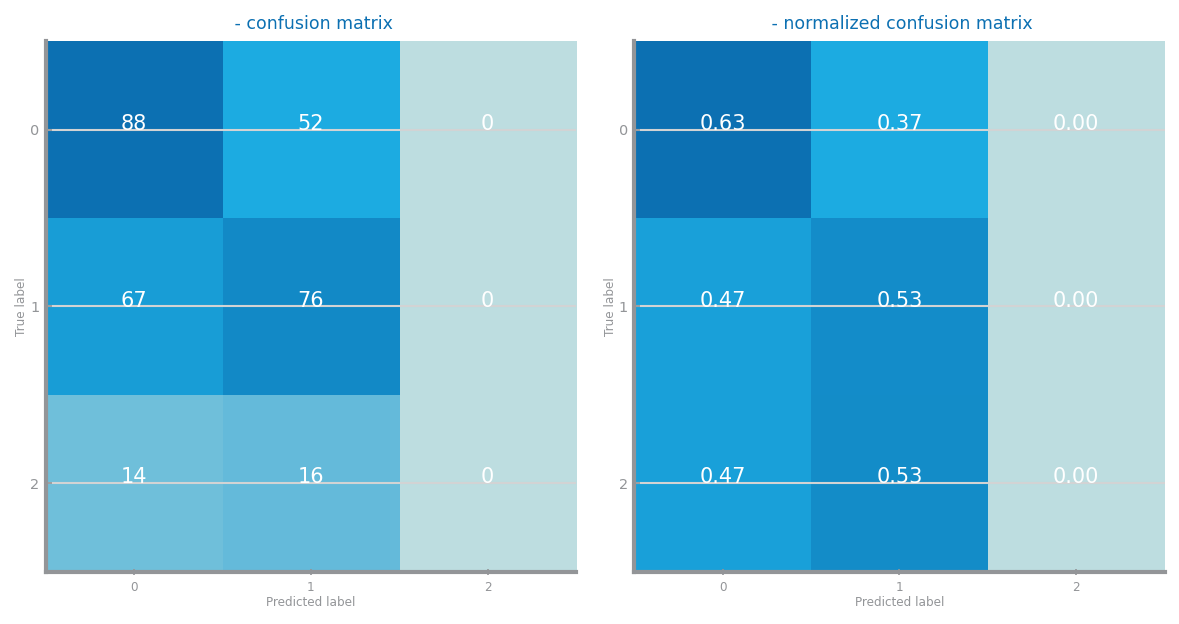

In [611]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from ds_charts import plot_evaluation_results, bar_chart, plot_confusion_matrix
from sklearn.metrics import confusion_matrix

labels = unique(trnY)
labels.sort()

clf = BernoulliNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

print(clf.score(tstX, tstY))

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,0], )
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,1], normalize=True)
plt.tight_layout()
plt.show()


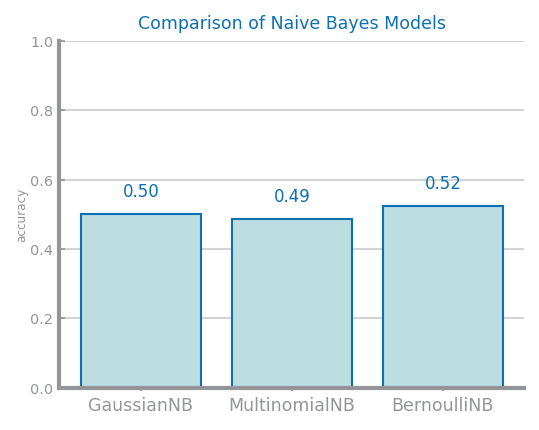

In [612]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score

estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB(),
              #'CategoricalNB': CategoricalNB
              }

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(accuracy_score(tstY, prdY))

figure()
bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='accuracy', percentage=True)
savefig(f'images/{file_tag}_nb_study.png')
show()

## Approach 2 - KNN

In [613]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, savefig, show
from sklearn.neighbors import KNeighborsClassifier
from ds_charts import plot_evaluation_results, multiple_line_chart, plot_overfitting_study
from sklearn.metrics import accuracy_score

eval_metric = accuracy_score
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
KNNscores = {}
best = (0, '')
last_best = 0
for d in dist:
    y_tst_values = []
    for n in nvalues:
        print(d,n)
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prd_tst_Y = knn.predict(tstX)
        y_tst_values.append(eval_metric(tstY, prd_tst_Y))
        if y_tst_values[-1] > last_best:
            best = (n, d)
            last_best = y_tst_values[-1]
    KNNscores[d] = y_tst_values

manhattan 1
manhattan 3
manhattan 5
manhattan 7
manhattan 9
manhattan 11
manhattan 13
manhattan 15
manhattan 17
manhattan 19
euclidean 1
euclidean 3
euclidean 5
euclidean 7
euclidean 9
euclidean 11
euclidean 13
euclidean 15
euclidean 17
euclidean 19
chebyshev 1
chebyshev 3
chebyshev 5
chebyshev 7
chebyshev 9
chebyshev 11
chebyshev 13
chebyshev 15
chebyshev 17
chebyshev 19


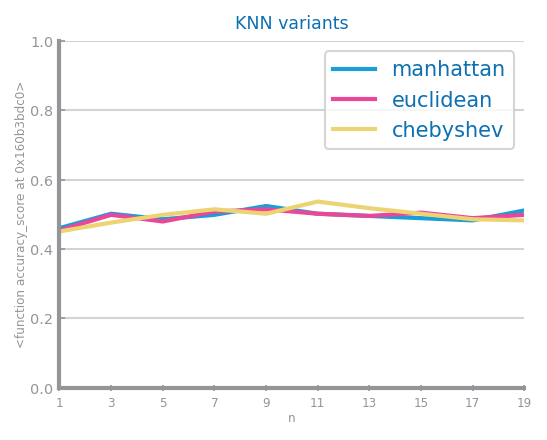

Best results with 11 neighbors and chebyshev


In [614]:
from ds_charts import multiple_line_chart
figure()
multiple_line_chart(nvalues, KNNscores, title='KNN variants', xlabel='n', ylabel=str(accuracy_score), percentage=True)
#savefig('images/{file_tag}_knn_study.png')
show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

0.536741214057508


<Figure size 600x450 with 0 Axes>

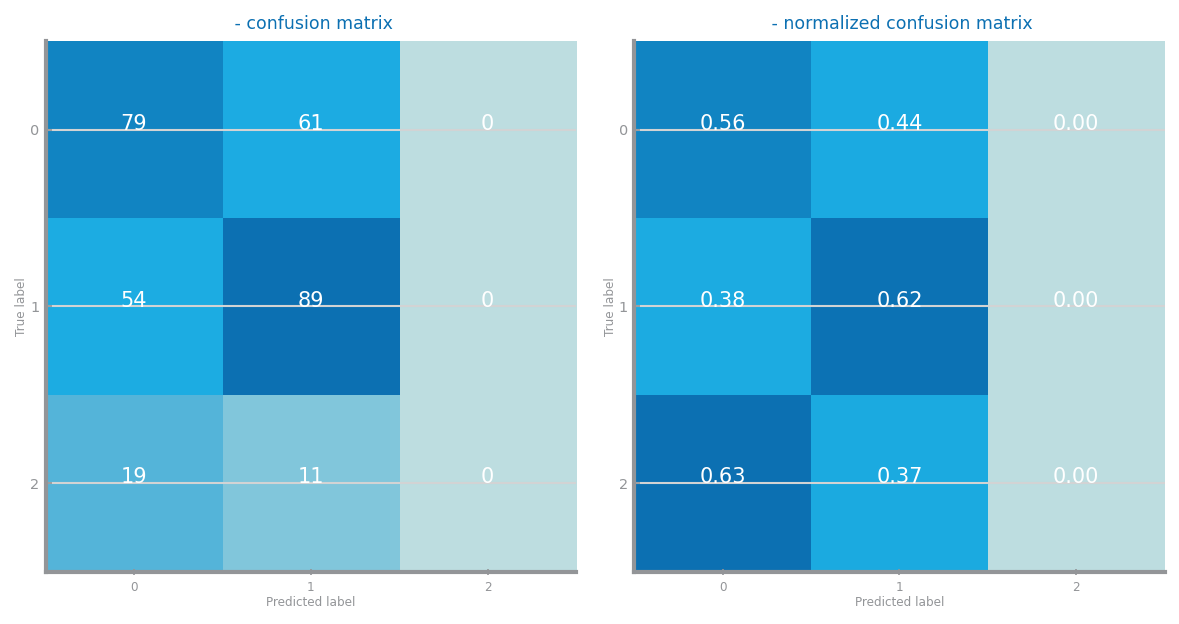

In [617]:
print(KNNscores[best[1]][5])

clf = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_tst = clf.predict(tstX)

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,0], )
plot_confusion_matrix(confusion_matrix(tstY, prd_tst, labels=labels), labels, ax=axs[0,1], normalize=True)
plt.tight_layout()
plt.show()